
ORIGINAL DATA
         Date   PM25   PM10    O3
0  2025-03-01   55.0   80.0  30.0
1  2025-03-02   48.0   90.0  32.0
2  2025-03-03   60.0   95.0  28.0
3  2025-03-04   72.0  110.0  35.0
4  2025-03-05   85.0  120.0   NaN
5  2025-03-06   90.0  130.0  45.0
6  2025-03-07  100.0  140.0  50.0
7  2025-03-08    NaN  150.0  48.0
8  2025-03-09   77.0    NaN  40.0

AFTER CLEANING
        Date     PM25     PM10    O3
0 2025-03-01   55.000   80.000  30.0
1 2025-03-02   48.000   90.000  32.0
2 2025-03-03   60.000   95.000  28.0
3 2025-03-04   72.000  110.000  35.0
4 2025-03-05   85.000  120.000  38.5
5 2025-03-06   90.000  130.000  45.0
6 2025-03-07  100.000  140.000  50.0
7 2025-03-08   73.375  150.000  48.0
8 2025-03-09   77.000  114.375  40.0

AFTER FEATURE ENGINEERING
        Date     PM25     PM10    O3  Day    Weekday
0 2025-03-01   55.000   80.000  30.0    1   Saturday
1 2025-03-02   48.000   90.000  32.0    2     Sunday
2 2025-03-03   60.000   95.000  28.0    3     Monday
3 2025-03-04   72.00

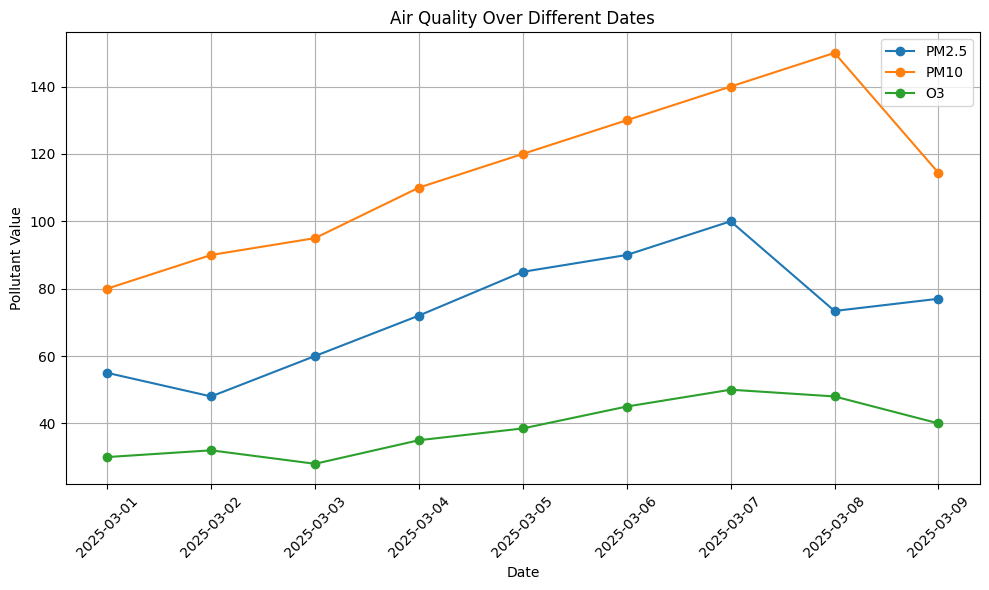

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------------------------
# 1. CREATE DIFFERENT SAMPLE DATA
# -----------------------------------------------

data = {
    "Date": [
        "2025-03-01", "2025-03-02", "2025-03-03", 
        "2025-03-04", "2025-03-05", "2025-03-06",
        "2025-03-07", "2025-03-08", "2025-03-09"
    ],
    "PM25": [55, 48, 60, 72, 85, 90, 100, None, 77],
    "PM10": [80, 90, 95, 110, 120, 130, 140, 150, None],
    "O3":   [30, 32, 28, 35, None, 45, 50, 48, 40]
}

df = pd.DataFrame(data)

print("\nORIGINAL DATA")
print(df)

# -----------------------------------------------
# 2. PREPROCESSING
# -----------------------------------------------

df["Date"] = pd.to_datetime(df["Date"])

df["PM25"] = df["PM25"].fillna(df["PM25"].mean())
df["PM10"] = df["PM10"].fillna(df["PM10"].mean())
df["O3"]   = df["O3"].fillna(df["O3"].mean())

print("\nAFTER CLEANING")
print(df)

# -----------------------------------------------
# 3. FEATURE ENGINEERING
# -----------------------------------------------

df["Day"]     = df["Date"].dt.day
df["Weekday"] = df["Date"].dt.day_name()

print("\nAFTER FEATURE ENGINEERING")
print(df)

# -----------------------------------------------
# 4. WEEKDAY COUNTS
# -----------------------------------------------

weekday_counts = df["Weekday"].value_counts()
print("\nWEEKDAY COUNT")
print(weekday_counts)

# -----------------------------------------------
# 5. PLOTTING
# -----------------------------------------------

plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["PM25"], marker="o", label="PM2.5")
plt.plot(df["Date"], df["PM10"], marker="o", label="PM10")
plt.plot(df["Date"], df["O3"],   marker="o", label="O3")

plt.title("Air Quality Over Different Dates")
plt.xlabel("Date")
plt.ylabel("Pollutant Value")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
